In [31]:
import numpy as np
import gym
import gym.spaces
import gym_oculoenv
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

env = gym.make('RandomDotMotionDiscriminationSkip-v0')


RandomDotMotionDiscriminationContent 0.05817764173314431 9 True False


In [32]:
from functions.lip import LIP
from functions.retina import Retina

In [33]:
retina = Retina()
# use_saliency_flowをTrueにすると，saliency map上でのopticalflowを計算
# use_flow_saliencyをTrueにすると，opticalflow上でのsaliency mapを作成
lip = LIP(use_saliency_flow=False, use_flow_saliency=False)

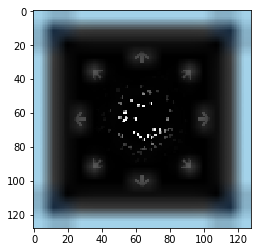

In [34]:
# initialize
obs_from_env = env.reset()
obs = retina({'from_environment': (obs_from_env, None)})['to_lip']
plt.imshow(obs)
plt.show()
inputs = {'from_retina': obs}
ret = lip(inputs)

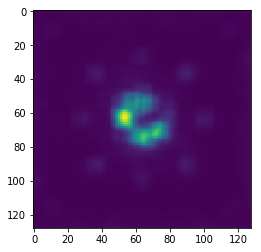

No handles with labels found to put in legend.


(128, 128, 2)


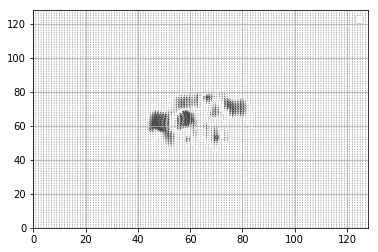

In [64]:
# saliency_map, optical_flow, flow_salicency_map
sal, opt, opt_sal = ret['to_fef']

plt.imshow(sal)
plt.show()

delta = .5
# resize_shape = (30,30)
# sal_resized = cv2.resize(sal, resize_shape[1::-1])
(sal_dx,sal_dy)  = np.gradient(sal, delta, delta)
sal_grad_list = np.vstack((sal_dx.flatten(),sal_dy.flatten()))
sal_grad_matrix = [list(x) for x in list(zip(*sal_grad_list))]
sal_grad_matrix = np.reshape(sal_grad_matrix, (128,128,2))
print(sal_grad_matrix.shape)

plt.quiver(-sal_dy,-sal_dy,angles="xy",headwidth=3,scale=20,color="#444444")
plt.xlim([0, 128])
plt.ylim([0, 128])
# plt.xlim([0, 30])
# plt.ylim([0, 30])
plt.grid()
plt.legend()
plt.show()

In [103]:
saliency = cv2.resize(sal, sal.shape[1::-1]).reshape(128,128,1)
print(saliency.shape)

(128, 128, 1)


4


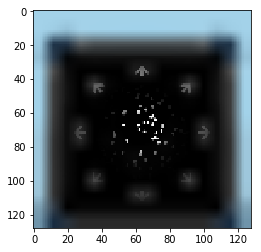

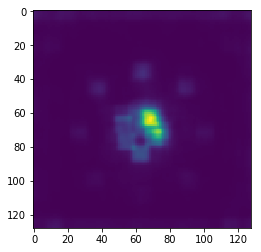

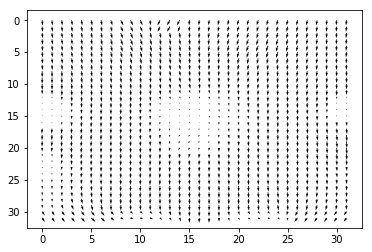

4


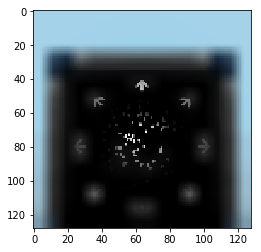

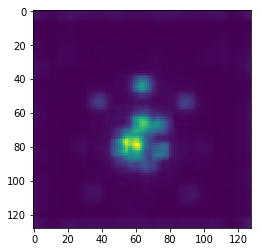

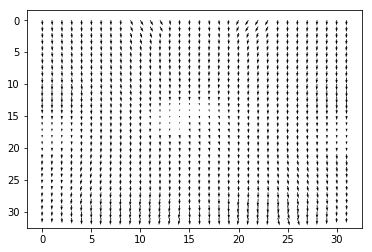

4


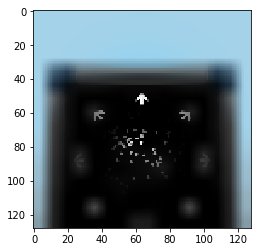

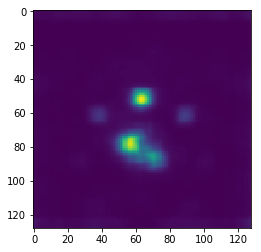

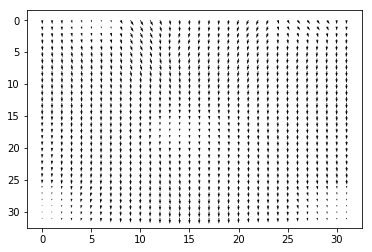

4


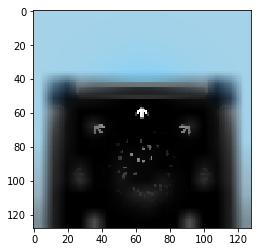

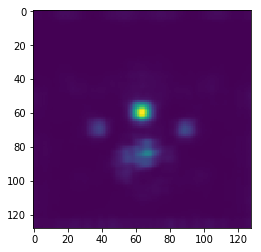

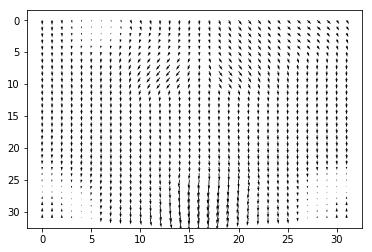

finished


In [15]:
for i in range(4):
    dh = np.random.uniform(low=-0.02, high=0.02)
    dv = np.random.uniform(low=-0.02, high=0.02)
#     action = np.array([dh, dv])
#     action = env.action_space.sample()
    action = 4
    print(action)
    obs_from_env, reward, done, _ = env.step(action)
    obs = retina({'from_environment': (obs_from_env, None)})['to_lip']
    if done:
        print("Episode terminated")
        obs_from_env = env.reset()
        obs = retina({'from_environment': (obs_from_env, None)})['to_lip']
    inputs = {'from_retina': obs}
    plt.imshow(obs)
    plt.show()
    ret = lip(inputs)
    sal, opt, opt_sal = ret['to_fef']
    plt.imshow(sal)
    plt.show()
    U = opt[::4,::4,0]
    V = opt[::4,::4,1]
    np.set_printoptions(threshold=np.inf)
    plt.quiver(U,V,angles='xy',scale_units='xy',scale=10)
    gca = plt.gca()
    gca.invert_yaxis()
    plt.show()
    if opt_sal is not None:
        plt.imshow(opt_sal)
        plt.show()
print('finished')

In [1]:
!pip list | grep ocu

gym-oculoenv                           0.0.3     
oculoenv                               0.1.3     /Users/hiroki11x/.pyenv/versions/3.6.5/lib/python3.6/site-packages
